<a href="https://colab.research.google.com/github/Sprusheeth/AI-ML-2303A51206/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

<ipython-input-15-0d8e2dc4aa99>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cancer',data=df,palette='RdBu_r')


ValueError: Could not interpret value `Cancer` for `x`. An entry with this name does not appear in `data`.

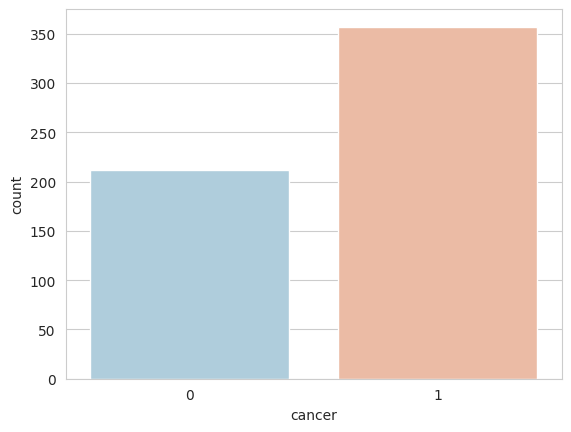

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()
print(cancer['DESCR'])
cancer['feature_names']
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.info()
df.describe()
np.sum(pd.isnull(df).sum())
cancer['target']
df['cancer']=pd.DataFrame(cancer['target'])
df.head()
sns.set_style('whitegrid')
sns.countplot(x='cancer',data=df,palette='RdBu_r')
l=list(df.columns[0:10])
for i in range(len(l)-1):
    sns.boxplot(x='Cancer',y=l[i], data=df, palette='winter')
    plt.figure()
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.scatter(df['mean area'],df['Cancer'])
ax1.set_title("Cancer cases as a function of mean area",
              fontsize=15)
ax2.scatter(df['mean smoothness'],df['Cancer'])
ax2.set_title("Cancer cases as a function of mean smoothness", fontsize=15)
df_feat = df.drop('Cancer',axis=1)
df_feat.head()
df_target = df['Cancer']
df_target.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target,test_size=0.30,random_state=101)
X_train.head()
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Misclassification error rate:",
      round(np.mean(predictions!=y_test),3))
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
# May take awhile!
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
param_grid = {'C': [50,75,100,125,150], 'gamma': [1e-2,1e-3,1e-4,1e-5,1e-6], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(tol=1e-5),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)
grid.best_estimator_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<ipython-input-16-c21611a1d628>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cancer', data=df, palette='RdBu_r')
<ipython-input-16-c21611a1d628>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancer', y=l[i], data=df, palette='winter')
<ipython-input-16-c21611a1d628>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancer', y=l[i], data=df, palette='winter')
<ipython-input-16-c21611a1d628>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

[[ 56  10]
 [  3 102]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171

Misclassification error rate: 0.076
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
[[ 59   7]
 [  4 101]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Estimator: SVC(C=100, gamma=1e-05, tol=1e-05)
[[ 59   7]
 [  4 101]]
      

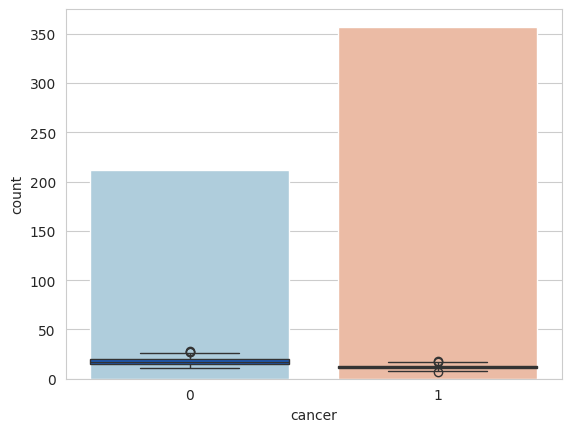

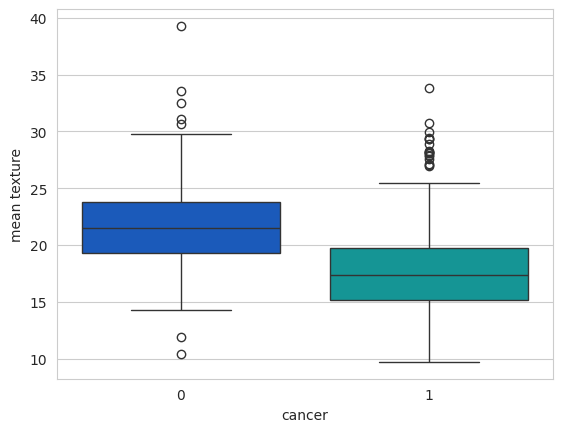

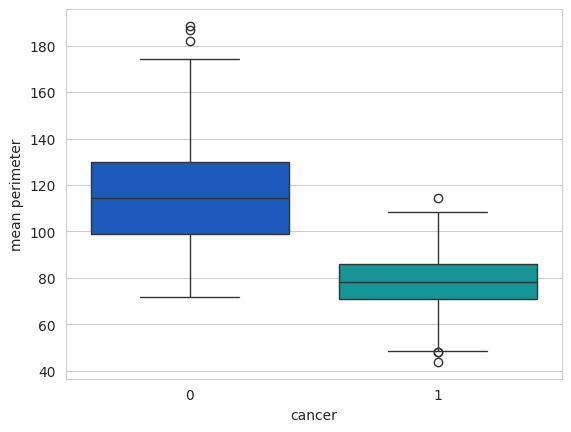

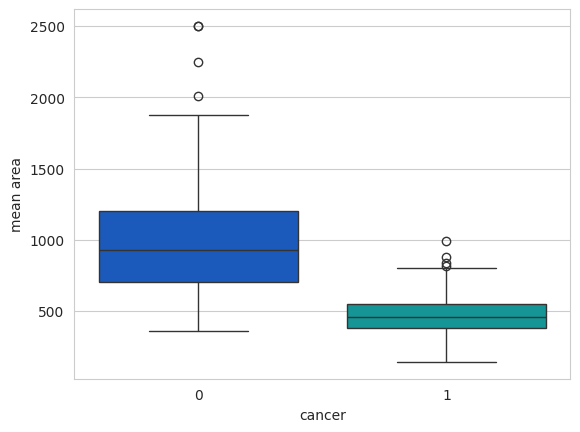

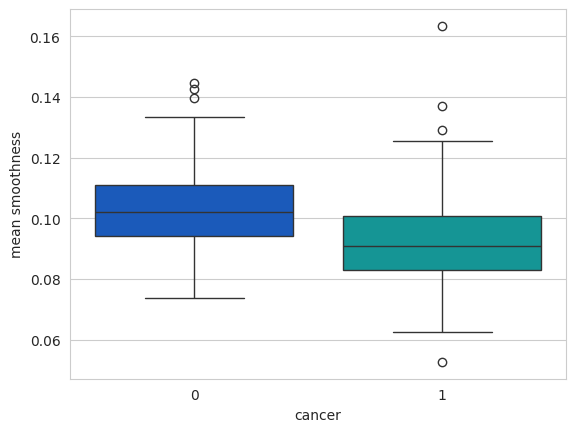

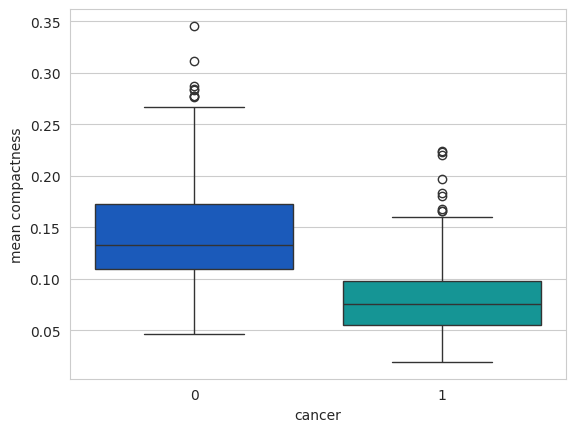

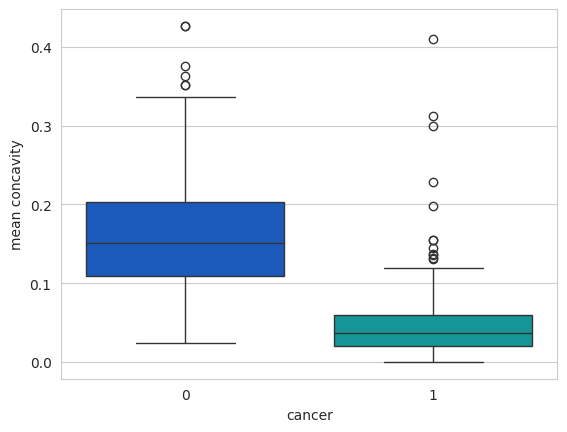

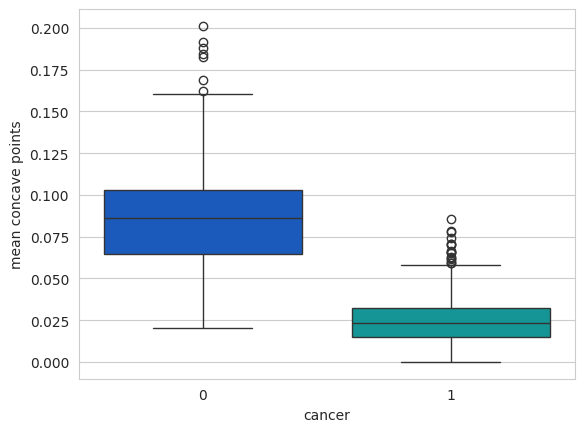

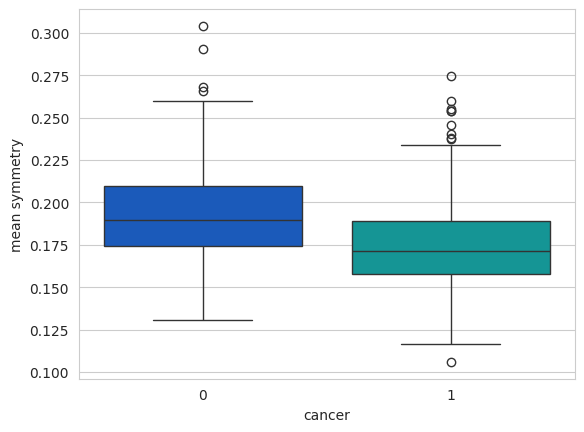

<Figure size 640x480 with 0 Axes>

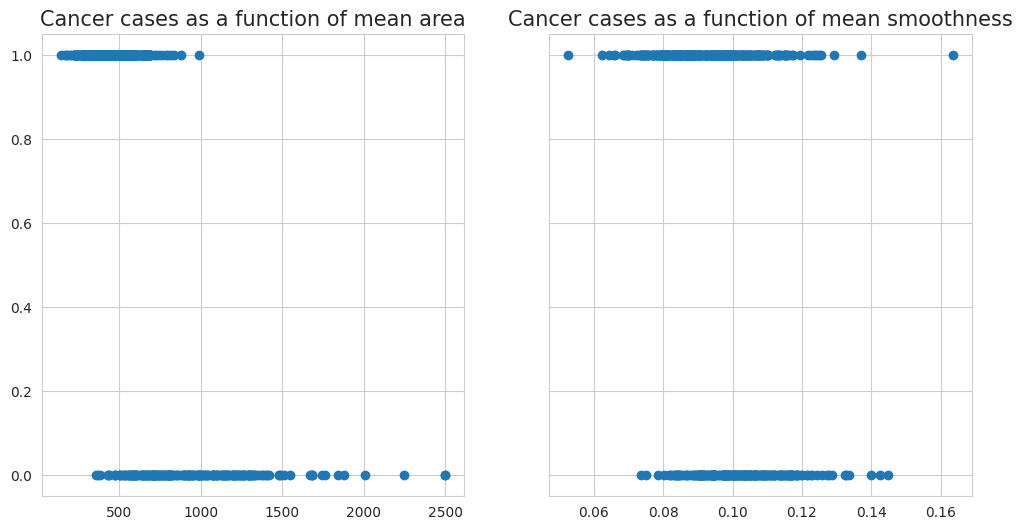

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the dataset
cancer = load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

# Add the target column to the DataFrame
df['cancer'] = cancer['target']

# Data overview
df.info()
df.describe()

# Check for missing values
print("Missing values:", np.sum(pd.isnull(df).sum()))

# Plot a countplot of the target variable
sns.set_style('whitegrid')
sns.countplot(x='cancer', data=df, palette='RdBu_r')

# Boxplots for selected features
l = list(df.columns[0:10])
for i in range(len(l)-1):
    sns.boxplot(x='cancer', y=l[i], data=df, palette='winter')
    plt.figure()

# Scatterplots for mean area and mean smoothness against cancer
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax1.scatter(df['mean area'], df['cancer'])
ax1.set_title("Cancer cases as a function of mean area", fontsize=15)
ax2.scatter(df['mean smoothness'], df['cancer'])
ax2.set_title("Cancer cases as a function of mean smoothness", fontsize=15)

# Prepare features and target variables for training
df_feat = df.drop('cancer', axis=1)
df_target = df['cancer']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30, random_state=101)

# Initialize and train the model
model = SVC()
model.fit(X_train, y_train)

# Predictions and evaluation
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Misclassification error rate:", round(np.mean(predictions != y_test), 3))

# Perform Grid Search to optimize parameters
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train)

# Best parameters and evaluation after Grid Search
print("Best Parameters:", grid.best_params_)
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

# Perform another Grid Search with different parameters
param_grid = {'C': [50, 75, 100, 125, 150], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(tol=1e-5), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train)

# Final evaluation after the second Grid Search
print("Best Estimator:", grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))
